# Minimize CO2 emissions through planning an optimal mix of waste management strategies

## Problem

**Context**: Hanoi, the capital of Vietnam, produces 7,500 tons of solid waste daily (2024). While maintaining a processing capacity of approximately 10,000 tons/day through incineration, recycling, composting, and landfilling. The city seeks to address two challenges: (1) maximizing waste reduction through effective strategy allocation and (2) minimizing CO2 emissions from waste processing. A multi-objective optimization problem is formulated to balance these goals while adhering to operational constraints, budgets, and public concerns about polluting technologies (particularly incineration and landfilling, the latter also poses spatial challenges).

**Objective**: Minimize environmental impact (CO2 emissions) while maximizing waste reduction (CO2 avoidance) through optimal allocation of waste management strategies. Doing so will help the city achieve its environmental goals and reduce the negative impact of waste processing on public health and the environment.

**Methods**: We use a linear programming model to find the optimal mix of waste management strategies to a multi-objective optimization problem and use the `cvxpy` library to solve the problem. The model can be adapted to other cities and regions by changing the input data and constraints.

## Optimization Model

**Decision Variables**: Let $x \in \mathbb{R}^4$ where $x_i$ is the amount of waste processed (tons/day) by strategy i. All strategies are ordered as incineration, recycling, composting, landfilling.

**Objective Function**: We formulate the multi-objective optimization problem using weighted sum method.

$$
\begin{aligned}
& \min_{x} \sum_{i}^{k} w_{k} f_{k}(x) \quad \forall \sum w_{k} = 1 \\
& \text{subject to constraints}
\end{aligned}
$$

where $w_k$ is the weight of the $k$-th objective function (i.e. scaling factor), and $f_k(x)$ is the $k$-th objective function.

(See Appendix C for full formulation) The weighted sum of CO2 avoided (waste reduction) and CO2 emitted:

$$
\min O(x) = w_1 \left( \alpha^\top x \cdot \beta \right) - w_2 \left( e^\top x \right) 
$$

where:
- $w_1, w_2$ are weights for waste reduction and emissions minimization respectively ($1 > w_1 > w_2 > 0$).
- $\alpha$: Effectiveness of each strategy in reducing waste.
- $\beta$: Conversion factor for CO2 avoided per ton of waste reduced.
- $e$: CO2 emitted per ton of waste processed.


### Constraints

**Waste Elimination**: All waste must be processed:

$$
\sum_{i=1}^4 x_i = W
$$

Where $W = 7,500 \, \text{tons/day}$.

**Operational Capacity**: Each strategy operates within specified bounds related to its capacity:
$$
x_{\text{min}, i} \leq x_i \leq x_{\text{max}, i} \quad \forall i
$$
- Incineration: $0.1 \cdot \text{capacity} \leq x_\text{inc} \leq 1.0 \cdot \text{capacity}$
- Landfilling: $0.1 \cdot \text{capacity} \leq x_\text{land} \leq 0.8 \cdot \text{capacity}$
- Recycling, Composting: $0.5 \cdot \text{capacity} \leq x \leq 1.1 \cdot \text{capacity}$

The lower bounds $l$ are set to ensure that each strategy contributes meaningfully to waste processing, while the upper bounds $u$ prevent overuse. Both bounds are lower for incineration and landfilling since they are less desirable by the public because of their negative environmental impact. When upper bound of a strategy > 1, the optimization result urges the city to invest in expanding the capacity of that strategy.

**Budget Constraint**: Total costs must not exceed the daily budget $B$ (around 150000 USD):

$$
\sum_{i=1}^4 \left( v_i x_i + f_i \right) \leq B
$$

where $v_i$ and $f_i$ are the variable and fixed costs of strategy $i$, respectively.

**Non-Negativity**:

$$
x_i \geq 0 \quad \forall i
$$


### Two Scenarios: With and Without Sorting

In general sorting enhances the effectiveness of recycling, composting, and incineration. The effectiveness values are adjusted for each strategy based on the sorting factor, when sorting is applied.

**Case 1: Without Sorting**
Sorting is not considered as a strategy. Each technology uses baseline effectiveness ($\alpha$).

**Case 2: With Sorting**
Sorting enhances the effectiveness of recycling, composting, and incineration by:
$$
\alpha_j' = \alpha_j \cdot \text{Interaction}_\text{sorting,j}
$$

# Problem Type and Feasible Region

This is a **linear programming (LP) problem** because:

- **Objective Function**: The objective function is a weighted sum of linear terms representing CO2 emissions avoided and emitted, making it linear.
- **Constraints**: All constraints (waste elimination, operational capacity, budget constraints, and non-negativity) are linear inequalities or equalities, which also conform to the structure of linear programming.

#### **Nature of the Feasible Region**
Since this is a linear programming problem, the feasible region is convex, bounded, and defined by linear constraints. The feasible region is the set of all values of $x$ that satisfy the constraints.

1. **Convexity**:
   - The feasible region is convex because it is formed by the intersection of half-spaces (defined by linear inequalities and equalities). Convexity ensures that any point on the line segment between two feasible solutions is also feasible.
   - This is a fundamental property of linear programming problems, guaranteeing that *local optima are also global optima*

2. **Linearity**:
   - All constraints are linear with respect to \( x \), which ensures the boundaries of the feasible region are flat planes or hyperplanes in higher dimensions.

3. **Boundedness**:
   - The constraints (e.g., capacity limits, budget) define upper and lower bounds on the decision variables, making the feasible region compact (finite in extent).
   - This bounded feasible region ensures the existence of an optimal solution within the defined constraints.

For a linear programming problem, the optimal solution, if it exists, will be found at a vertex or along an edge of the feasible region, making it easier to identify. The convex nature of the feasible region and the linearity of the objective function ensure that the optimal solution is both unique and globally optimal.

# Solution

In this section, all units are tons of CO2 per day unless otherwise specified.

## Code Implementation
We use `cvxpy` to solve the optimization problem. Full code is available in **Appendix D**, which leverages the data and estimates provided in **Appendix A** and **Appendix B**.

| Technology   | Capacity | Variable cost (USD/ton) | Fixed cost (USD) | Effectiveness | CO2 reduced | CO2 Emission | Sorting |
|--------------|----------|-------------------------|------------------|---------------|-------------|--------------|---------|
| Incineration | 4300     | 30                      | 700              | 0.8           | -0.05       | 1.5          | 1.1     |
| Recycling    | 1300     | 25                      | 500              | 0.3           | -0.50       | 0.5          | 1.5     |
| Composting   | 2000     | 15                      | 550              | 0.5           | -0.60       | 0.2          | 1.5     |
| Landfilling  | 2700     | 15                      | 600              | 0.1           | -0.20       | 1.0          | -       |

## Results & Interpretation

| **Technology**   | **Waste Processed** | **Capacity** | **CO2 Avoided** | **CO2 Emitted** | **Cost (USD/day)** |
|------------------|---------------------|--------------|-----------------|-----------------|--------------------|
| **Incineration** | 1996.67             | 4300.0       | -79.87          | 2995.00         | 59900.0            |
| **Recycling**    | 520.00              | 1300.0       | -78.00          | 260.00          | 13000.0            |
| **Composting**   | 2283.33             | 2000.0       | -685.00         | 456.67          | 34250.0            |
| **Landfilling**  | 2700.00             | 2700.0       | -54.00          | 2700.00         | 40500.0            |
| **Total**        | 7500.00             | 10300.0      | -896.87         | 6411.67         | 147650.0           |

All constraints are satisfied, and the optimal solution is found. Key results include:

- All 7500 tons of daily waste are distributed among the four strategies, with the highest allocation to composting and landfilling.
- Composting contributes the most to CO2 avoidance (-685 tons/day), followed by recycling (-78 tons/day).
- Total cost is USD 147,650/day, within the budget constraints.

## Sensitivity Analysis: Impact of Parameters on Waste Allocation

The three plots demonstrate how **sorting**, **weight $w_1$** for waste reduction, and **lower bound capacity rates** $x_min$ rates (of recycling and composting) affect waste distribution across the strategies.

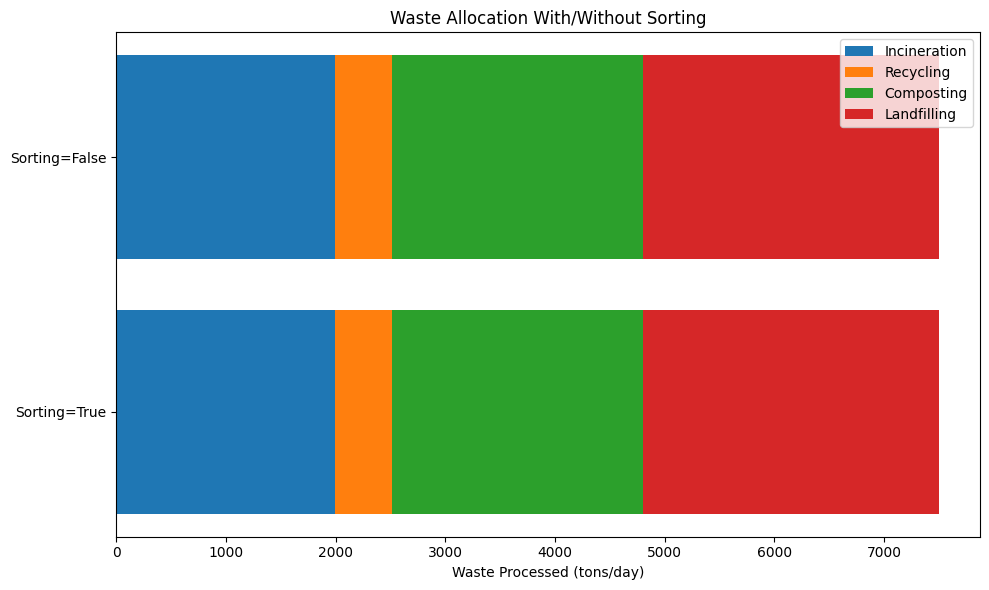
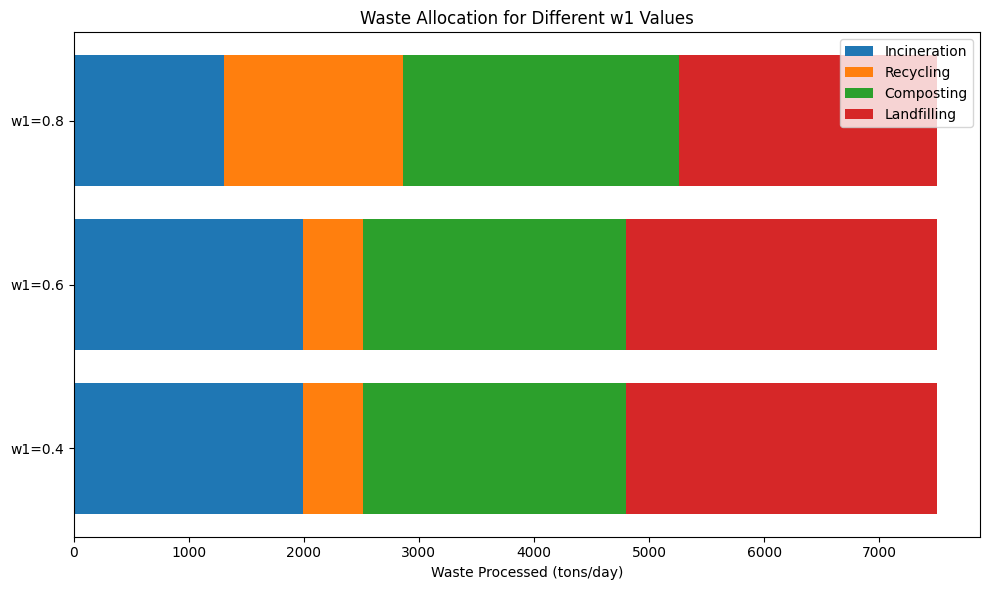
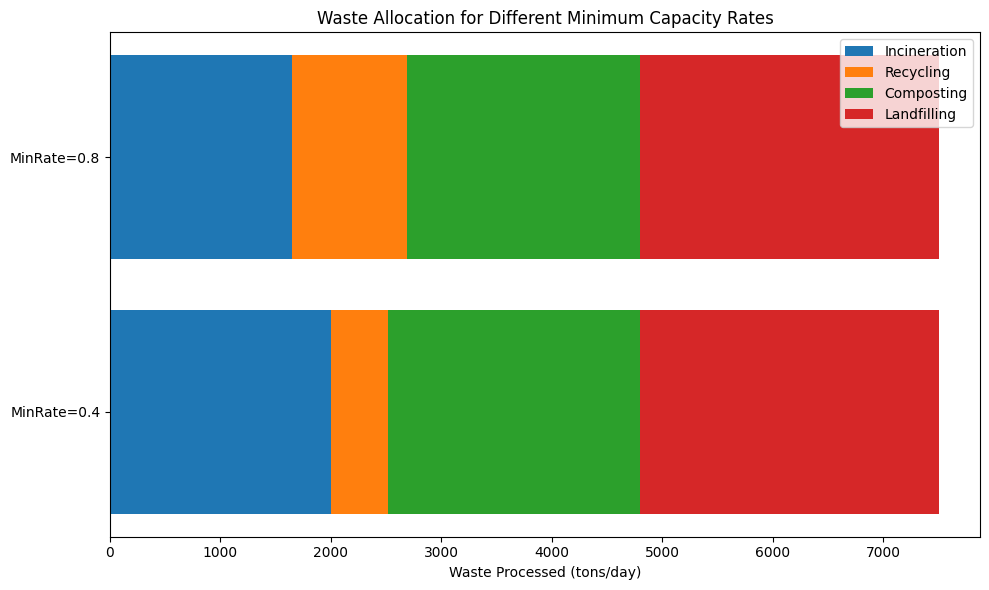


| **Param**         | **Key Observation**                                                                                          | **Recommendation**                                                                                                                |
|-------------------|--------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------|
| Sorting (yes/no)  | Sorting increases allocation to recycling and composting, reducing reliance on incineration and landfilling. | Invest in sorting systems to enhance recycling and composting efficiency.                                                        |
| Weight $w_1$      | Higher $w_1$ prioritizes waste reduction, shifting allocation toward recycling and composting.               | Use higher $w_1$ (e.g., 0.8) for environmental goals; lower $w_1$ for cost-driven policies.                                       |
| $x_min$ rates     | Higher rates force utilization of recycling and composting but may reduce flexibility of strategies and increase costs. | Moderate minimum rates (e.g., 0.4–0.6) balance utilization of environment-friendly strategies and operational flexibility. |

# AI Note

ChatGPT 4o was used to produce and debug the code and summarize the findings from the references.

# Personal notes

I expended a lot of time trying to extract data from sources and debug infeasibility of the problem, so I submitted late. Sorry for being late, but I want to submit a reasonable solution and realistic report.

Some examples of infeasible problems I encountered and had to relax
- The total capacity of all strategies is less than the total waste produced.
- The budget constraint is too tight (it was 100k instead of 150k), so the model cannot find a feasible solution.
- The minimum capacity rate of recycling and composting is too high, or the maximum capacity rate of incineration and landfilling is too low.

# References

Government of Vietnam. (2014, April 25). _Bill No. 609/QĐ-TTg of the Prime Minister: Approving the Solid Waste Treatment Plan for Hanoi until 2030, with a Vision for 2050_. https://vanban.chinhphu.vn/default.aspx?pageid=27160&docid=173548

Leroy, M. L. N., & Cong, V. C. (2016). SOLID WASTE TYPOLOGY AND MANAGEMENT IN HANOI. In _Report Presented During the Kick-off Meeting of Blue Barrels Project Held in Hanoi_ (p. 30th november 2015). https://umr-selmet.cirad.fr/en/content/download/4052/29638/version/3/file/IMV_REPORT_WASTETYPOLOGY_HANOI.pdf 

N, H. T. (2024, June 17). _Quy hoạch Thủ đô Hà Nội: Cần xây dựng lộ trình phân loại chất thải rắn sinh hoạt tại nguồn [Hanoi Waste Planning: The Need to Develop a Roadmap for Household Solid Waste Sorting at the Source]_. Báo Xây Dựng (Official News From Ministry of Construction). Retrieved December 20, 2024, from https://baoxaydung.com.vn/quy-hoach-thu-do-ha-noi-can-xay-dung-lo-trinh-phan-loai-chat-thai-ran-sinh-hoat-tai-nguon-377482.html

# Appendix

## Appendix A. Current Waste Management Scenario in Hanoi

### Waste Generation and Composition

The projected estimate for solid waste is 7,500 tons/day (2024), predominantly domestic waste​ (70%-80%) with the remainder from commercial and industrial sources. It is projected to increase to 17000 tons/day by 2045.

### Waste Management Strategies

1. **Incineration with Energy Recovery**: Facilities like Sóc Sơn Waste-to-Energy Plant process large volumes of waste and recover energy, reducing waste by **70%-90%**.
2. **Sanitary Landfilling**: Residual waste is disposed of in sanitary landfills with gas and leachate recovery systems.
3. **Composting**: Organic waste is converted into fertilizer, commonly practiced in smaller facilities.
4. **Recycling**: Materials like plastic, paper, and metal are recycled in designated facilities.
5. **Waste Sorting at Source**: Targets reducing treatment requirements, but implementation remains limited.
6. **Advanced Biological Treatment**: Organic waste is processed into biogas and compost.                             |

### Technology-Based Capacities (Estimates)
These are estimated capacities for each waste management technology in Hanoi (deduced from data for zone-wise waste management facilities and technologies).

| **Technology**                          | **Capacity (tons/day)** | **Key Facilities**                                              |
| --------------------------------------- | ----------------------- | --------------------------------------------------------------- |
| **Incineration (with energy recovery)** | 4,000                   | Sóc Sơn, Kiêu Kỵ, Phù Đổng, Châu Can, Cao Dương, Đồng Ké        |
| **Recycling**                           | 1,200                   | Facilities in all zones focusing on plastics, metals, paper     |
| **Composting**                          | 2,300                   | Smaller-scale composting at Kiêu Kỵ, Phù Đổng, rural facilities |
| **Landfilling**                         | 3,000                   | Núi Thoong, Tây Đằng, Vân Đình                                  |

### Technology Effectiveness
- **Incineration**: Reduces 80%-90% of volume, generates energy (~500 kWh/ton).
- **Recycling**: Diverts 20%-30% of waste.
- **Composting**: Reduces 50%-70% of organic waste volume.

### Costs and Budget

Estimated Total Investment 2020-2030: 8,000 billion VND (350 million USD) for waste management infrastructure.

**Costs by Strategy**:

- **Waste-to-Energy Plants**: High initial investment (~50-80 million USD per plant).
- **Recycling Facilities**: Medium-high (~10-30 million USD depending on technology).
- **Composting Facilities**: Moderate (~5-10 million USD per plant).
- **Landfill Upgrades**: Low-medium (~5 million USD per hectare).

### Environmental Impact Estimates

Positive Impacts

1. **Landfill Reduction**: Waste-to-energy incineration reduces landfill needs by **50%-70%**.
2. **Recycling**: Potentially diverts **20%-30%** of waste.
3. **Composting**: Handles organic waste, supporting sustainable agriculture.

Negative Impacts

1. **Incineration**: Air pollution risks (e.g., dioxins) if not managed properly.
2. **Landfilling**: Methane emissions and potential groundwater contamination.
3. **Transportation**: Increased CO2 emissions, noise, and road wear due to waste transport.


## Appendix B. Waste Reduction to CO2 Emissions

1. **Sorting at Source**: Reduces waste requiring treatment by **60%-70%**, contingent on public participation and infrastructure development. Carbon savings: **0.05 tons CO2 per ton of waste processed**.
2. **Recycling**: Effectively reduces recyclable waste by **20%-30%**. Carbon savings: **0.1 tons CO2 per ton of waste processed**.
3. **Composting**: Reduces organic waste (70% of total) by **50%-70%**. Carbon savings: **0.2 tons CO2 per ton of waste processed**.
4. **Incineration with Energy Recovery**: Reduces mixed residual waste volume by **70%-90%**. Carbon savings: **0.7 tons CO2 per ton of waste processed**.
5. **Landfilling**: Least effective; primarily a containment solution for residuals. Carbon savings: **1.5 tons CO2 per ton of waste processed**.

### Additional information

1. **Key Challenges**:
   - Delayed implementation of sorting-at-source initiatives.
   - Public resistance to new facilities due to environmental concerns.
2. **Potential Enhancements**:
   - Integration of AI and IoT for real-time waste monitoring.
   - Expansion of biogas capture and advanced composting facilities.


## Appendix C. Full Formulation of Objective Function

Let $x \in \mathbb{R}^{4}$ be the decision variable representing the amount of waste (tons/day) to be processed by the four strategies incineration, recycling, recycling, composting, and landfilling.

### Multi-objective optimization: Weighted sum method

We aim to solve a multi-objective optimization problem using the weighted sum method. 

$$
\begin{aligned}
& \min_{x} \sum_{i}^{k} w_{k} f_{k}(x) \quad \forall \sum w_{k} = 1 \\
& \text{subject to constraints}
\end{aligned}
$$

where $w_k$ is the weight of the $k$-th objective function (i.e. scaling factor), and $f_k(x)$ is the $k$-th objective function.

Usually the choice of weights is arbitrary and manual, the solution is sensitive to the choice of weights, and the method does not guarantee the Pareto optimal solution in a non-convex case. For better interpretability of the results where both function values are equivalent in units and scales, we convert both functions to CO2 emissions.

### From waste to CO2 emissions
Each waste management strategy processes $x_i$ tons of waste per day, and emits $e_i$ tons of CO2 per ton of waste processed. The conversion process for waste is: waste generation -> waste processing -> waste reduction (using an effectiveness factor $\alpha_i$) -> CO2 emissions avoidance (using a conversion rate $\beta_i$). Formally, the CO2 emissions for each strategy are:

\begin{equation}
c_i = - w_{1} (x_i \cdot \alpha_i \cdot \beta_i) + w_{2} (x_i \cdot e_i) \quad (\text{tons/day}) \quad \forall i=1,2,\ldots,5 
\end{equation}

where $w_{1}$ is the weight of the waste reduction objective function, $w_{2}$ is the weight of the CO2 emissions objective function. Since the former is relatively more important, we set $w_{1} = 0.8$ and $w_{2} = 0.2$.

### Combined objective function

The combined objective function maximizes waste reduction and minimizes environmental impact during waste processing. Both use CO2 emissions (tons/day) as the proxy.

$$
\begin{aligned}
\min O(\mathbf{x}) = w_{1} \mathbf{\alpha}^{\top} \mathbf{x} \cdot \mathbf{\beta} - w_{2} \mathbf{e}^{\top} \mathbf{x} \quad (\text{tons/day})
\end{aligned}
$$

where
- $1 \leq w_1 > w_2 \geq 0$ are the scalar weights of the objective functions. The weights sum to 1.
- $x_i$ is the amount of waste (tons/day) to be processed by the $i$-th strategy
- $\alpha_i$ is the effectiveness factor of the $i$-th strategy in reducing waste (dimensionless)
- $\beta_i$ is the conversion rate from waste reduced to CO2 emissions avoided (dimensionless)
- $e_i$ is tons of CO2 emitted per ton of waste processed by the $i$-th strategy

## Appendix D. Waste Management Allocation Model


In [35]:
import cvxpy as cp
import numpy as np
import pandas as pd

# Data dictionary
data = {
    "Technology": ["Incineration", "Recycling", "Composting", "Landfilling"],
    "Capacity": [4300, 1300, 2000, 2700],
    "Variable_Cost": [30, 25, 15, 15],  # Cost per ton processed in USD
    "Fixed_Cost": [700, 500, 550, 600],  # Fixed cost in USD
    "Effectiveness": [0.8, 0.4, 0.5, 0.1], # Efficiency in reducing waste
    "CO2_Rate": [-0.05, -0.5, -0.6, -0.2],  # CO2 avoided per ton reduced
    "Emission": [1.5, 0.5, 0.2, 1.0],  # CO2 emitted per ton processed
    "Sorting_Interaction": [1.1, 1.5, 1.5, 1.0], # How sorting affects effectiveness
}

# Problem parameters
W = 7500  # Total waste generated in tons/day
B = 150_000 # 8000 billion VND for 10 years at 26,000 VND/USD

# Objective weights
w1 = 0.6
w2 = 1-w1

# Convert dictionary to DataFrame for display
data_df = pd.DataFrame(data)
data_df


,Technology,Capacity,Variable_Cost,Fixed_Cost,Effectiveness,CO2_Rate,Emission,Sorting_Interaction
0,Incineration,4300,30,700,0.8,-0.05,1.5,1.1
1,Recycling,1300,25,500,0.4,-0.50,0.5,1.5
2,Composting,2000,15,550,0.5,-0.60,0.2,1.5
3,Landfilling,2700,15,600,0.1,-0.20,1.0,1.0


In [36]:
with_sorting = True # Adjustable

# Decision variables
x = cp.Variable(data_df.shape[0], nonneg=True)  # Tons/day for each strategy

# Parameters
capacity = np.array(data["Capacity"])
effectiveness = np.array(data["Effectiveness"])
co2_rate = np.array(data["CO2_Rate"])
emission_rate = np.array(data["Emission"])
variable_cost = np.array(data["Variable_Cost"])
fixed_cost = np.array(data["Fixed_Cost"])
sorting_interaction = np.array(data["Sorting_Interaction"]) if with_sorting else np.ones_like(effectiveness) 

min_capa_rates = np.array([0.0, 0.4, 0.4, 0.0]) # Adjustable
max_capa_rates = np.array([1.0, 1.2, 1.2, 1.0]) # Adjustable

# Objective functions
waste_reduction_func = x @ (effectiveness * co2_rate * sorting_interaction)  # CO2 avoided
co2_emissions_func = x @ emission_rate  # CO2 emitted
objective = w1 * waste_reduction_func - w2 * co2_emissions_func

# Constraints
constraints = [
    cp.sum(x) == W,  # Waste elimination constraint
    x <= capacity * max_capa_rates,
    x >= capacity * min_capa_rates,
    x @ variable_cost + np.sum(fixed_cost) <= B,  # Budget constraint
]

# Problem definition
problem = cp.Problem(cp.Minimize(objective), constraints)

# Solve the problem
# problem.solve(verbose=True) # for debugging
problem.solve()

if problem.status == "infeasible":
    print("Problem is infeasible. Consider relaxing budget or capacity constraints.")
elif problem.status == "optimal_inaccurate":
    print("Problem is solved but the solution may be inaccurate. Consider checking the results.")
elif problem.status == "unbounded":
    print("Problem is unbounded. Consider adding constraints or adjusting the problem formulation.")
else:
    print("Problem is solved successfully.")
    if x.value is not None:
        results = {
            "Technology": data["Technology"],
            "Waste Processed (tons/day)": x.value,
            "Capacity (tons/day)": capacity,
            "CO2 Avoided (tons/day)": x.value * effectiveness * co2_rate,
            "CO2 Emitted (tons/day)": x.value * emission_rate,
            "Cost (USD/day)": x.value * variable_cost,
        }
        results_df = pd.DataFrame(results)
        # add a row for total by column, except for the technology column
        results_df.loc["Total"] = results_df.sum(numeric_only=True)
        print("\nOptimization Results:")

results_df.round(2)

Problem is solved successfully.

Optimization Results:


,Technology,Waste Processed (tons/day),Capacity (tons/day),CO2 Avoided (tons/day),CO2 Emitted (tons/day),Cost (USD/day)
0,Incineration,1996.67,4300.0,-79.87,2995.00,59900.0
1,Recycling,520.00,1300.0,-104.00,260.00,13000.0
2,Composting,2283.33,2000.0,-685.00,456.67,34250.0
3,Landfilling,2700.00,2700.0,-54.00,2700.00,40500.0
Total,NaN,7500.00,10300.0,-922.87,6411.67,147650.0


In [26]:
for i, constraint in enumerate(constraints):
    print(f"Constraint {i+1}: {constraint.dual_value}")

Constraint 1: 0.07359999431042329
Constraint 2: [8.29020893e-11 1.93591238e-10 3.03376623e-09 6.20000029e-02]
Constraint 3: [1.22003921e-10 1.99266666e-01 1.35606560e-10 6.57192803e-11]
Constraint 4: 0.018426666859475513


## Appendix D: Data for Sensitivity Analysis

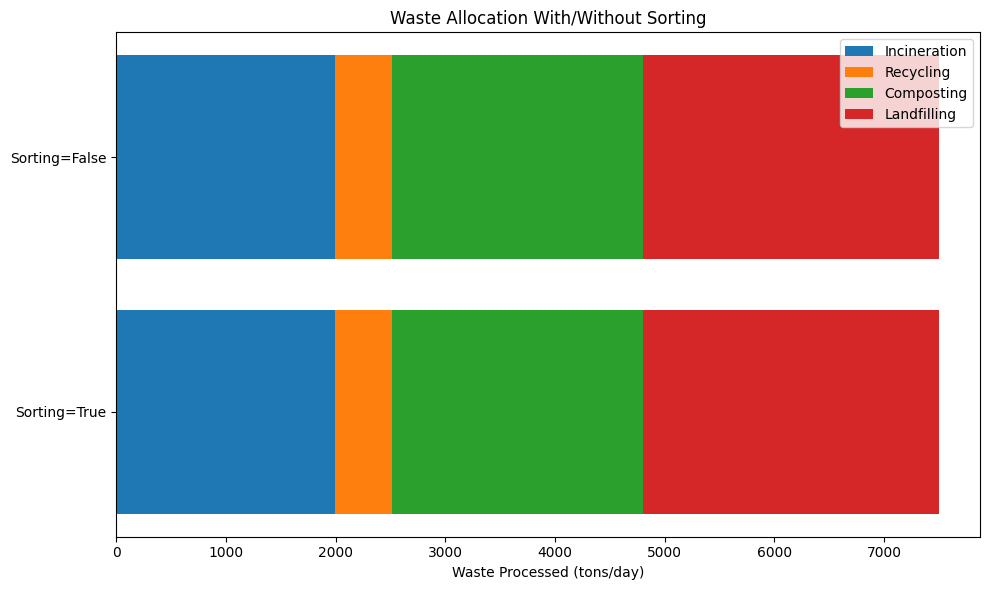

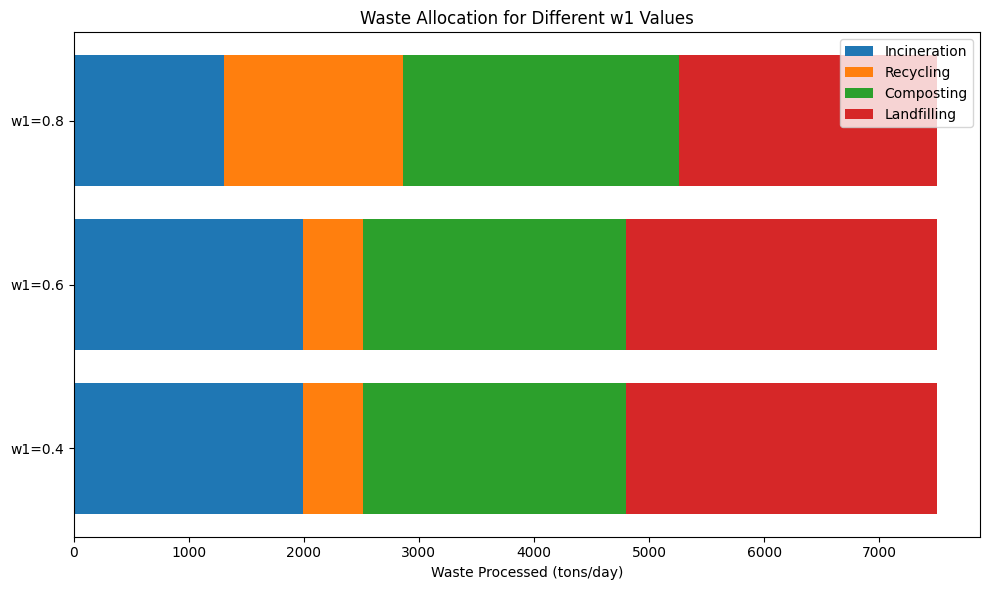

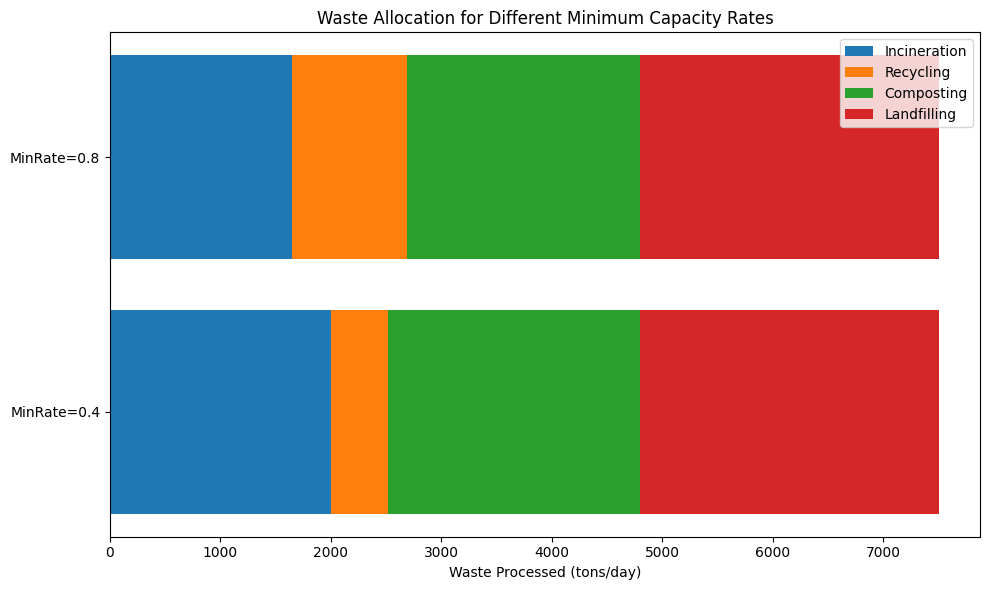

In [47]:
import matplotlib.pyplot as plt

def solve_optimization(with_sorting=True, w1=0.6, min_capa_rates=np.array([0.0, 0.4, 0.4, 0.0])):

    # Objective weights
    w2 = 1 - w1

    # Convert dictionary to DataFrame for display
    data_df = pd.DataFrame(data)

    # Decision variables
    x = cp.Variable(data_df.shape[0], nonneg=True)  # Tons/day for each strategy

    # Parameters
    capacity = np.array(data["Capacity"])
    effectiveness = np.array(data["Effectiveness"])
    co2_rate = np.array(data["CO2_Rate"])
    emission_rate = np.array(data["Emission"])
    variable_cost = np.array(data["Variable_Cost"])
    fixed_cost = np.array(data["Fixed_Cost"])
    sorting_interaction = np.array(data["Sorting_Interaction"]) if with_sorting else np.ones_like(effectiveness)

    max_capa_rates = np.array([1.0, 1.2, 1.2, 1.0])  # Adjustable

    # Objective functions
    waste_reduction_func = x @ (effectiveness * co2_rate * sorting_interaction)  # CO2 avoided
    co2_emissions_func = x @ emission_rate  # CO2 emitted
    objective = w1 * waste_reduction_func - w2 * co2_emissions_func

    # Constraints
    constraints = [
        cp.sum(x) == W,  # Waste elimination constraint
        x <= capacity * max_capa_rates,
        x >= capacity * min_capa_rates,
        x @ variable_cost + np.sum(fixed_cost) <= B,  # Budget constraint
    ]

    # Problem definition
    problem = cp.Problem(cp.Minimize(objective), constraints)

    # Solve the problem
    problem.solve()

    if problem.status == "infeasible":
        print("Problem is infeasible. Consider relaxing budget or capacity constraints.")
        return None
    elif problem.status == "optimal_inaccurate":
        print("Problem is solved but the solution may be inaccurate. Consider checking the results.")
        return None
    elif problem.status == "unbounded":
        print("Problem is unbounded. Consider adding constraints or adjusting the problem formulation.")
        return None
    else:
        if x.value is not None:
            results = {
                "Technology": data["Technology"],
                "Waste Processed (tons/day)": x.value,
                "Capacity (tons/day)": capacity,
                "CO2 Avoided (tons/day)": x.value * effectiveness * co2_rate,
                "CO2 Emitted (tons/day)": x.value * emission_rate,
                "Cost (USD/day)": x.value * variable_cost,
            }
            results_df = pd.DataFrame(results)
            results_df.loc["Total"] = results_df.sum(numeric_only=True)
            return results_df.round(2)

def plot_results():
    # Prepare sets of results
    scenarios_sorting = []
    scenarios_weights = []
    scenarios_min_rates = []

    labels_sorting = []
    labels_weights = []
    labels_min_rates = []

    # Generate results for with/without sorting
    for with_sorting in [True, False]:
        results_df = solve_optimization(with_sorting=with_sorting)
        if results_df is not None:
            scenarios_sorting.append(results_df["Waste Processed (tons/day)"].values[:-1])
            labels_sorting.append(f"Sorting={with_sorting}")

    # Generate results for different w1 values
    for w1 in np.arange(0.4, 0.9, 0.2):
        results_df = solve_optimization(w1=w1)
        if results_df is not None:
            scenarios_weights.append(results_df["Waste Processed (tons/day)"].values[:-1])
            labels_weights.append(f"w1={w1:.1f}")

    # Generate results for different minimum capacity rates
    for min_rate in [np.array([0.0, 0.4, 0.4, 0.0]), np.array([0.0, 0.8, 0.8, 0.0])]:
        results_df = solve_optimization(min_capa_rates=min_rate)
        if results_df is not None:
            scenarios_min_rates.append(results_df["Waste Processed (tons/day)"].values[:-1])
            labels_min_rates.append(f"MinRate={min_rate[1]:.1f}")

    # Plot for each set
    technologies = ["Incineration", "Recycling", "Composting", "Landfilling"]

    def plot_single(scenarios, labels, title):
        scenarios = np.array(scenarios)
        x = np.arange(len(labels))
        fig, ax = plt.subplots(figsize=(10, 6))
        bottoms = np.zeros(len(labels))

        for i, tech in enumerate(technologies):
            ax.barh(x, scenarios[:, i], left=bottoms, label=tech)
            bottoms += scenarios[:, i]

        # Add labels and legend
        ax.set_yticks(x)
        ax.set_yticklabels(labels)
        ax.set_xlabel("Waste Processed (tons/day)")
        ax.set_title(title)
        ax.legend()

        plt.tight_layout()
        plt.show()

    plot_single(scenarios_sorting, labels_sorting, "Waste Allocation With/Without Sorting")
    plot_single(scenarios_weights, labels_weights, "Waste Allocation for Different w1 Values")
    plot_single(scenarios_min_rates, labels_min_rates, "Waste Allocation for Different Minimum Capacity Rates")

plot_results()